In [348]:
'''
ORDER
1. Collecting data
2. Analyzing data
3. Data cleaning AKA Data wrangling
4. Train & test
5. Accuracy test
'''

# 1. Collecting data
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline


url = 'datasets/titanic_null.csv'
dataset = pd.read_csv(url)
print(dataset.shape)
dataset.head()

(887, 10)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Yo1,Yo2
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,Yo,NaN
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,Yo,NaN
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,Yo,NaN
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,Yo,NaN
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,Yo,NaN


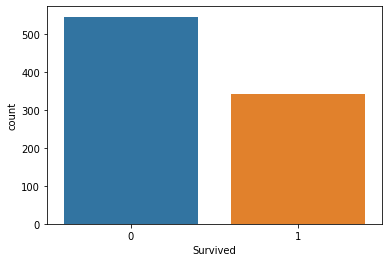

In [349]:
# 2. Analyzing data
# Create different plots among variables

# How many survived and how many not
sns.countplot(x='Survived', data=dataset)

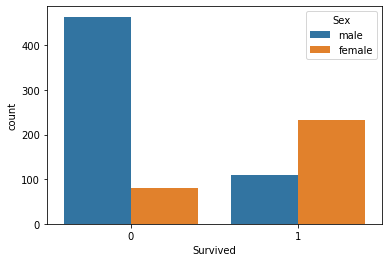

In [350]:
# Among survived passengers how many were men and how many were women
sns.countplot(x='Survived', hue='Sex', data=dataset)

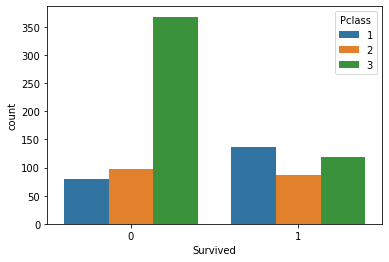

In [351]:
# How classes affect to survived passengers
sns.countplot(x='Survived', hue='Pclass', data=dataset)

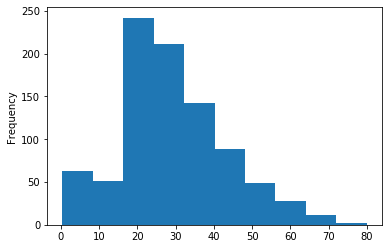

In [352]:
# Age distrubution among passengers
dataset['Age'].plot.hist()

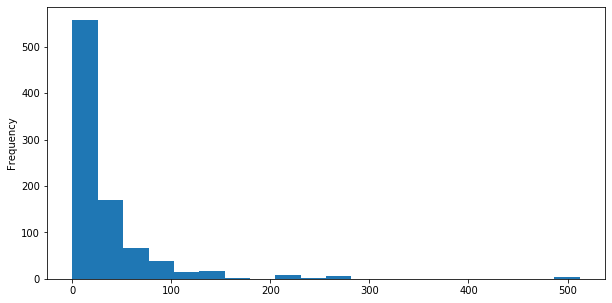

In [353]:
# Fares distribution among passengers
dataset['Fare'].plot.hist(bins=20, figsize=(10,5))

In [354]:
# In order to analyze more data, Let's see what are the other columns left
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 10 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
Yo1                        161 non-null object
Yo2                        120 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.4+ KB


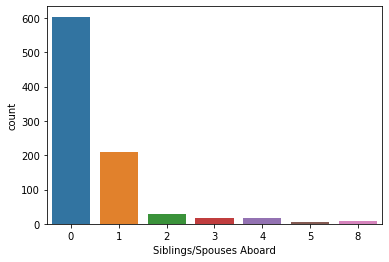

In [355]:
# Siblings/Spouses Aboard distribution among passengers
sns.countplot(x='Siblings/Spouses Aboard', data=dataset)

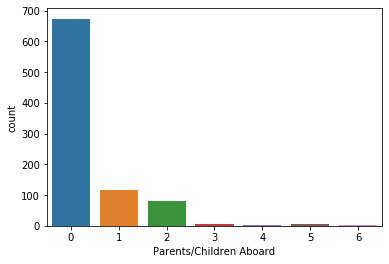

In [356]:
# Parents/Children Aboard distribution among passengers
sns.countplot(x='Parents/Children Aboard', data=dataset)

In [357]:
# 3. Data cleaning
# Since I got the dataset from kaggle it's already removed most unnessasary data
# Let's add some null values to dataset and call it again

# Check whether there's any null values in data
dataset.isnull()
# False = Not Null, True = Null

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Yo1,Yo2
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
882,False,False,False,False,False,False,False,False,True,True
883,False,False,False,False,False,False,False,False,True,True
884,False,False,False,False,False,False,False,False,True,True
885,False,False,False,False,False,False,False,False,True,True


In [358]:
# Check SUM of null data
dataset.isnull().sum()

Survived                     0
Pclass                       0
Name                         0
Sex                          0
Age                          0
Siblings/Spouses Aboard      0
Parents/Children Aboard      0
Fare                         0
Yo1                        726
Yo2                        767
dtype: int64

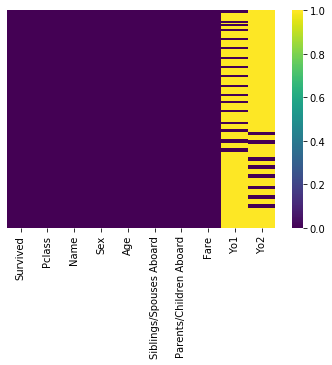

In [359]:
# Visually analyze null data using heatmap
sns.heatmap(dataset.isnull(), yticklabels=False, cmap='viridis') # We don't need lables in y-axis- 
# Add cmap for color coding

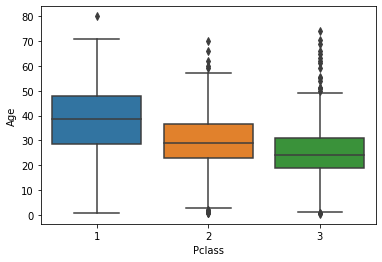

In [360]:
# Draw a box plot and analyze the column Age vs Pclass
sns.boxplot(x='Pclass', y='Age', data=dataset)
# Result shows that passengers travel in higher classes are older

In [361]:
# We found that we have some missing values in certain columns
# We can either fill the values or drop that column for accurate
# results - Let's drop those columns using list of column names
drop_col_list = ['Yo1', 'Yo2']
dataset.drop(drop_col_list, axis=1, inplace=True)

## TO-DO ! ==> https://machinelearningmastery.com/handle-missing-data-python/

In [362]:
dataset.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


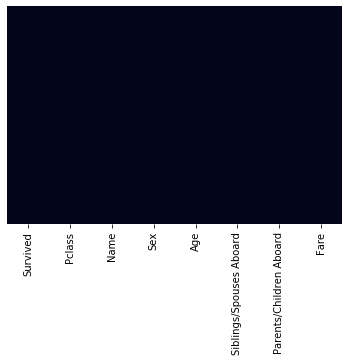

In [363]:
# Check null values in a heatmap
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

In [364]:
# Check null of sum values
dataset.isnull().sum()
# Dataset is cleaned as it don't have any null value or NaN value

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [365]:
# Convert string values to categorical varibles in order to
# implement logistic regression - convert to dummy varibles
# Press TAB to get more functions
# Press Shift + TAB to get more info
pd.get_dummies(dataset['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
882,0,1
883,1,0
884,1,0
885,0,1


In [366]:
# We don't need both of these columns to say male or female
# We can say if male = 1 it's male and if male = 0, it's female
sex = pd.get_dummies(dataset['Sex'], drop_first=True)
sex.head(5)
# See video 3.40.32 if want to handle three possibilities
## MAKE ALL VARIABLES CATEGORICAL to RUN LOGISTIC REGRESSION
# '''
# Example:
# # C Q S
# 0 0 0 1
# 1 1 0 0
# 2 0 0 1
# 3 0 0 1
# 4 0 0 1

# let's assume column name 'Embark' habe three possibilities
# C, Q, S

# We can drop_first using:
# embark = pd.get_dummies(dataset['Embark'], drop_first=True)
# '''

,male
0,1
1,0
2,0
3,0
4,1


In [367]:
# Do the same thing to Pclass as well
pas_class = pd.get_dummies(dataset['Pclass'], drop_first=True)
pas_class.head(5)
# 2nd and 3rd columns are left
# so both 2nd and 3rd are 0 -> Passengers travelling in first class

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [368]:
# Concatnate all new rules to a new dataset
dataset = pd.concat([dataset, sex, pas_class], axis = 1)
dataset.head(5)

# male column
# 1 = male
# 0 = female

# P class column
# 2 3
# 0 1 -> 3rd class
# 1 0 -> 2nd class
# 0 0 -> 1st class (NOT 2nd or 3rd class)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [369]:
# Let's drop unwanted columns - 'Sex', 'Pclass'
dataset.drop(['Name', 'Sex', 'Pclass'], axis = 1, inplace = True)

In [370]:
dataset.head(5)

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [371]:
# 4. Train & test
# Build a model on train data and predict the output on 
# test data - Split dataset in to two train and test
X = dataset.drop('Survived', axis = 1)# Add all things to test as independant variable
y = dataset['Survived'] # Dependent Variable

In [372]:
# Split data into training and testing subsets
# Using sklearn train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
# if random state = 1
# it takes the same dataset to train all the time which gives same results

In [373]:
# Train and by creating a model
# Logistic Regression will graph on the linear regression
# Create instances of logistic regression model

LR_model = LogisticRegression()

In [374]:
# Fit the model
LR_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [375]:
# Make prediction
predictions = LR_model.predict(X_test)

In [376]:
# Evaluvate how the model has been performing check accuracy and
# calculate a classification_report

classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.76      0.91      0.83       179\n           1       0.79      0.55      0.65       114\n\n    accuracy                           0.77       293\n   macro avg       0.77      0.73      0.74       293\nweighted avg       0.77      0.77      0.76       293\n'

In [347]:
# Value of precision 0.77, 0.73 and 0.74 - Not that bad
# In order to calculate accuracy we can use confusion_matrix
confusion_matrix(y_test, predictions)
'''
confusion_matrix is: 
2 x 2 matrix that has 4 outcomes which shows how accurate our valus are,

   PN  PY
AN 162 17 
AY 51  63

PN - Predicted NO 
PY - Predicted Y
AN - Actual NO
AY - Actual Yes 

TRUE Negative  => 162 *
FALSE Positive => 17
TRUE Positive  => 63  *
FALSE Negative => 51


63 and 162 => Where model actually predicted the correct output
Accuracy is [SUM(AN.PN + AY.PY)]/ SUM(ALL) = SUM(162+63) / SUM(162+17+63+51)
225/293 = 0.7679180887 => 76%
'''

array([[162,  17],
       [ 51,  63]])

In [378]:
# Get the results from accuracy_score
accuracy_score(y_test, predictions)*100.0

76.79180887372013